In [118]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim 
from sklearn.metrics import classification_report
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [5]:
# Normalizer for the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [84]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.d1 = nn.Dropout()
        self.fc2 = nn.Linear(120, 84)
        self.d2 = nn.Dropout()
        self.fc3 = nn.Linear(84, 10)
#         self.d3 = nn.Dropout()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = self.fc3(x)
        return x

In [14]:
PATH = ''
torch.save(net.state_dict(), PATH)

In [85]:
%%time
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr=0.001)
# optimizer = optim.Adadelta(net.parameters(), lr=0.001)
# optimizer = optim.
# Training the network


for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    false = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        preds = [list(x).index(max(x)) for x in outputs]
        
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        for a, b in zip(preds, labels):
            if a==b:
                correct +=1
            else:
                false += 1
        
        if i % 1000 == 999:    # print every 1000 mini-batches
            acc = correct/(correct + false)
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f} acc: {acc:.3f}')
            print(f'{epoch + 1} {i + 1:5d} {running_loss / 1000:.3f} {acc:.3f}')
            running_loss = 0.0
            correct = 0
            false = 0

PATH = 'Dropout.pth'
torch.save(net.state_dict(), PATH)

1  1000 2.301 0.114
1  2000 2.242 0.157
1  3000 2.096 0.203
1  4000 2.003 0.224
1  5000 1.899 0.278
1  6000 1.869 0.285
1  7000 1.837 0.306
1  8000 1.785 0.328
1  9000 1.775 0.337
1 10000 1.734 0.367
1 11000 1.730 0.359
1 12000 1.692 0.377
2  1000 1.627 0.407
2  2000 1.643 0.400
2  3000 1.651 0.374
2  4000 1.608 0.399
2  5000 1.587 0.414
2  6000 1.574 0.426
2  7000 1.584 0.427
2  8000 1.577 0.417
2  9000 1.555 0.443
2 10000 1.519 0.448
2 11000 1.542 0.434
2 12000 1.529 0.445
3  1000 1.504 0.458
3  2000 1.486 0.465
3  3000 1.512 0.456
3  4000 1.500 0.460
3  5000 1.450 0.465
3  6000 1.475 0.465
3  7000 1.455 0.468
3  8000 1.499 0.464
3  9000 1.453 0.474
3 10000 1.478 0.459
3 11000 1.459 0.473
3 12000 1.426 0.480
4  1000 1.403 0.492
4  2000 1.414 0.503
4  3000 1.426 0.483
4  4000 1.425 0.485
4  5000 1.427 0.487
4  6000 1.405 0.493
4  7000 1.414 0.490
4  8000 1.425 0.486
4  9000 1.410 0.505
4 10000 1.434 0.485
4 11000 1.415 0.490
4 12000 1.402 0.508
5  1000 1.393 0.509
5  2000 1.358 0.518


In [86]:
def get_data(path):
    instances = []
    losses = []
    accuracies = []
    
    with open(path, 'r') as infile:
        content = infile.read()
        for c in content.split('\n'):
            (e, instance, loss, acc) = c.split() 
            instances.append((int(e)-1) * 12000 + int(instance))
            losses.append(float(loss))
            accuracies.append(float(acc))
            
    return instances, losses, accuracies

instances, losses, accuracies = get_data('results/Q12Base.txt')
i, l, a = get_data('results/Q12DROPOUT.txt')

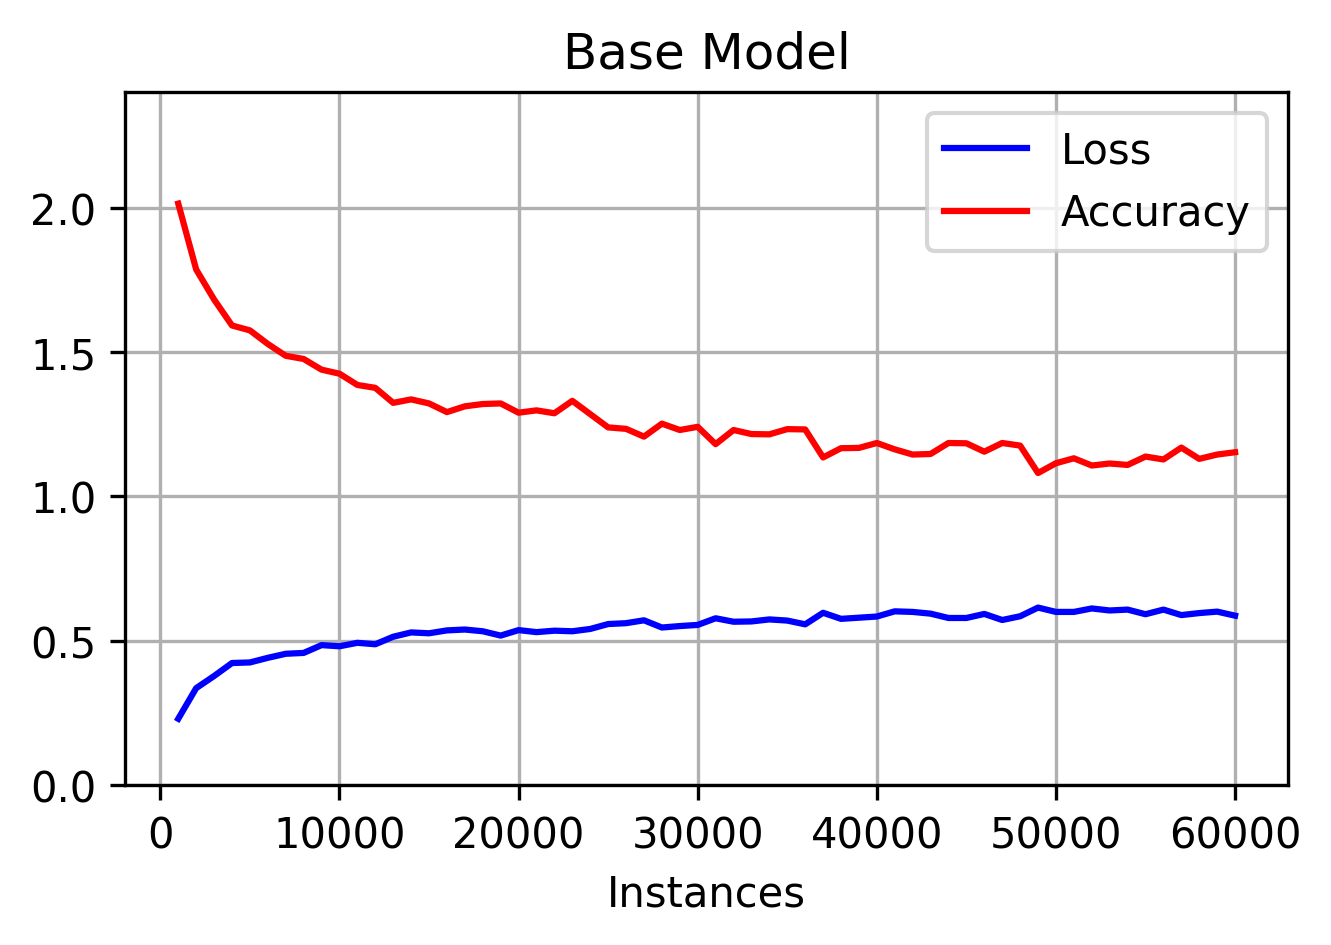

In [110]:
plt.figure(figsize=(5, 3), dpi=300)
plt.ylim([0, 2.4])
plt.grid()
plt.plot(instances, accuracies, c='blue')
plt.title('Base Model')
plt.xlabel('Instances')
plt.plot(instances, losses, c='red')
plt.legend(['Loss', 'Accuracy']);


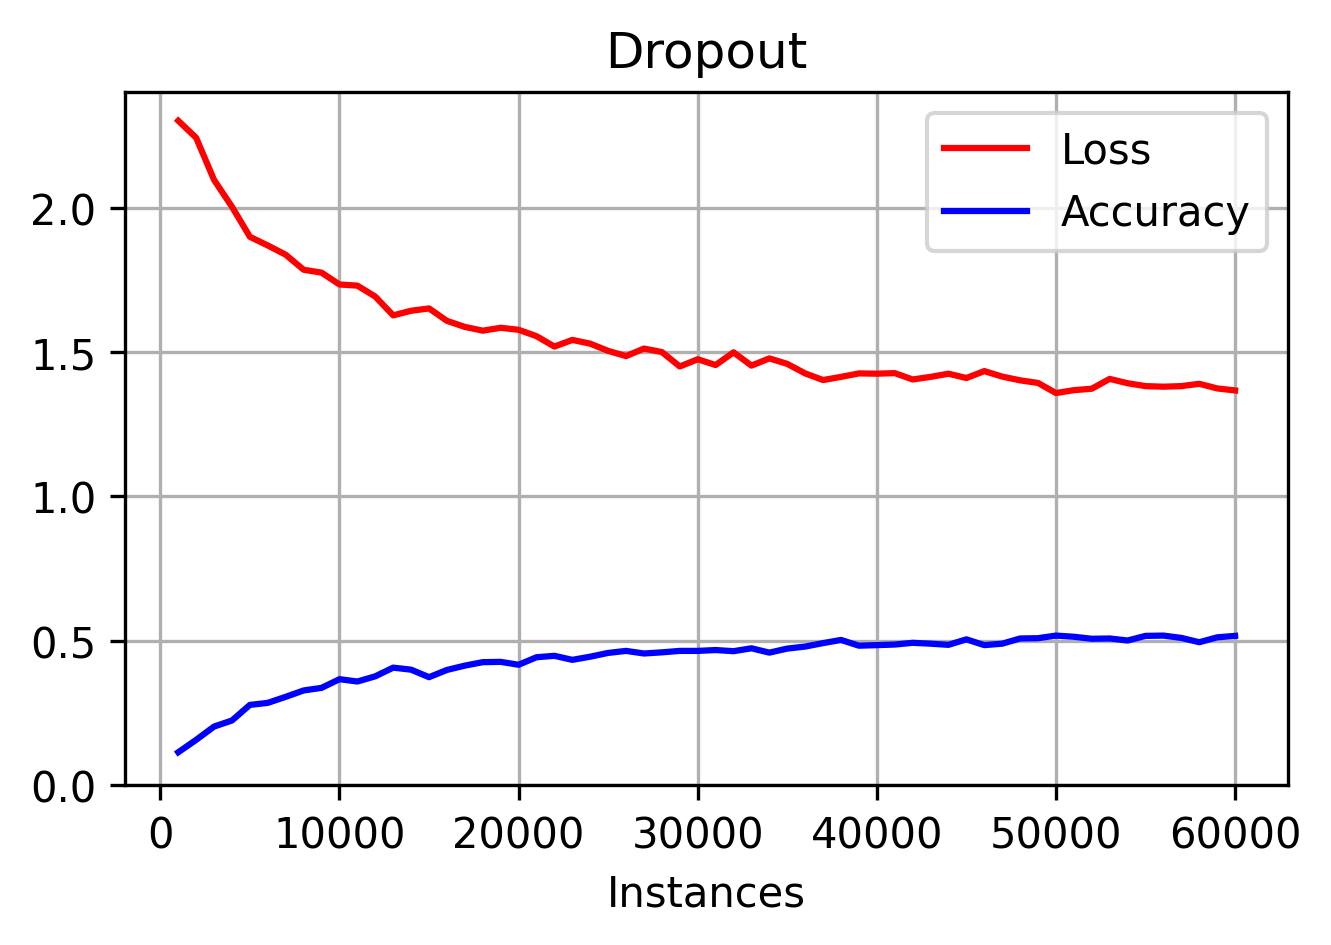

In [109]:
plt.figure(figsize=(5, 3), dpi=300)
plt.grid()
plt.ylim([0, 2.4])
plt.plot(i, l, c='red')
plt.plot(i, a, c='blue')
plt.legend(['Loss', 'Accuracy'])
plt.xlabel('Instances')
plt.title('Dropout');


In [121]:
net1 = Net()
net.load_state_dict(torch.load('cifar_net.pth'));

In [113]:
net2 = Net()
net.load_state_dict(torch.load('Dropout.pth'))

<All keys matched successfully>

In [122]:
# Normalizer for the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

predictions = []
true_y = []
for x, y in testloader:
    outputs = net1(x)
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(predicted[0])
    true_y.append(y[0])
print(classification_report(true_y, predictions))


Files already downloaded and verified
Files already downloaded and verified
              precision    recall  f1-score   support

           0       0.08      0.02      0.03      1000
           1       0.06      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.08      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      0.00      0.01      1000
           6       0.10      0.04      0.05      1000
           7       0.25      0.01      0.02      1000
           8       0.00      0.00      0.00      1000
           9       0.10      0.91      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.03     10000
weighted avg       0.08      0.10      0.03     10000



/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazar/opt/anaconda3/envs/AML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [6]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'HuberLoss',
 'Identity',
 'InstanceNorm1d